In [42]:
import pandas as pd
import xgboost as xgb
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [43]:
def changev(x):
    if x == '学三':
        return 1
    elif x == '学二':
        return 2
    elif x == '学一':
        return 3
    elif x == '国励':
        return 4
    elif x == '国奖':
        return 5
    else:
        return 0

In [44]:
data_path='./data2.xlsx'
data = pd.read_excel(data_path)
data['性别'] = data['性别'].apply(lambda x:1 if x == '男'  else 0)
data['奖学金'] = data['奖学金'].apply(changev)
data.head()


,Unnamed: 0,性别,现在专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,...,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖,“双培计划”学习进步奖,“双培计划”优秀学生干部,奖学金
0,0,0,26,1,87.6327,1,72.15,4.0,0,18,...,1,0,0,0,0,0,0,0,0,1
1,1,0,26,2,89.9434,1,70.50,3.0,0,18,...,1,0,0,0,0,0,0,0,0,1
2,2,0,26,3,88.4667,1,NaN,NaN,0,18,...,1,0,0,0,0,0,0,0,0,1
3,3,1,52,2,86.3803,1,76.40,NaN,0,6,...,1,0,0,0,0,0,0,0,0,1
4,4,1,52,3,87.5455,1,NaN,5.0,0,6,...,1,0,0,0,0,0,0,0,0,2


In [45]:
X=data.iloc[:,1:25]
Y=data.iloc[:,25]

In [46]:
Y.head()

0    1
1    1
2    1
3    1
4    2
Name: 奖学金, dtype: int64

In [47]:
X.head()

,性别,现在专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,实践实习,...,青学之星,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖,“双培计划”学习进步奖,“双培计划”优秀学生干部
0,0,26,1,87.6327,1,72.15,4.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
1,0,26,2,89.9434,1,70.50,3.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
2,0,26,3,88.4667,1,NaN,NaN,0,18,1,...,0,1,0,0,0,0,0,0,0,0
3,1,52,2,86.3803,1,76.40,NaN,0,6,2,...,0,1,0,0,0,0,0,0,0,0
4,1,52,3,87.5455,1,NaN,5.0,0,6,2,...,0,1,0,0,0,0,0,0,0,0


In [48]:
X = X.drop('“双培计划”学习进步奖', axis=1)
X = X.drop('青学之星', axis=1)
X = X.drop('“双培计划”优秀学生干部', axis=1)
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)

In [49]:
X.head()

,性别,现在专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,实践实习,...,学术创新,文化活动,体育活动评价成绩,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖
0,0,26,1,87.6327,1,72.150000,4.000000,0,18,1,...,2,0,0,1,0,0,0,0,0,0
1,0,26,2,89.9434,1,70.500000,3.000000,0,18,1,...,2,0,0,1,0,0,0,0,0,0
2,0,26,3,88.4667,1,71.259305,9.723596,0,18,1,...,2,0,0,1,0,0,0,0,0,0
3,1,52,2,86.3803,1,76.400000,9.723596,0,6,2,...,1,0,5,1,0,0,0,0,0,0
4,1,52,3,87.5455,1,71.259305,5.000000,0,6,2,...,1,0,5,1,0,0,0,0,0,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

In [51]:
xgb_train=xgb.DMatrix(X_train,label=y_train)
xgb_test=xgb.DMatrix(X_test,label=y_test)

In [52]:
import sklearn.metrics as metrics
def f1(preds, dtrain):
    y_train = dtrain.get_label() # 'numpy.ndarray'
    y_pred = [np.argmax(d) for d in preds]
    return 'f1', metrics.f1_score(y_train, y_pred, average='weighted')

In [53]:
params={
    'objective':'multi:softmax',
    'eta':0.1,
    'max_depth':7,
    'n_estimators':500,
    'num_class':6,
    'alpha': 0.6,
    'lambda': 1.4,
    'colsample_bytree':0.97,
    'min_child_weight':0.5,
    'gamma':0.015,
}

watchlist=[(xgb_train,'train'),(xgb_test,'test')]
# 设置训练轮次
num_round=120
bst=xgb.train(params,xgb_train,num_round,watchlist,feval=f1)

[03:06:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[0]	train-mlogloss:1.63374	train-f1:0.72896	test-mlogloss:1.63647	test-f1:0.70621
[1]	train-mlogloss:1.50251	train-f1:0.74401	test-mlogloss:1.50906	test-f1:0.71589
[2]	train-mlogloss:1.39538	train-f1:0.75193	test-mlogloss:1.40570	test-f1:0.71931
[3]	train-mlogloss:1.30559	train-f1:0.75199	test-mlogloss:1.31966	test-f1:0.72242
[4]	train-mlogloss:1.22918	train-f1:0.75599	test-mlogloss:1.24737	test-f1:0.72603
[5]	train-mlogloss:1.16146	train-f1:0.75720	test-mlogloss:1.18425	test-f1:0.72821
[6]	train-mlogloss:1.10342	train-f1:0.75816	test-mlogloss:1.13003	test-f1:0.72704
[7]	train-mlogloss:1.05125	train-f1:0.76077	test-mlogloss:1.08250	test-f1:0.72519
[8]	train-mlogloss:1.00681	train-f1:0.76226	test-mlogloss:1.04149	test-f1:0.72518
[9]	train-mlogloss:0.96521	train-f1:0.76491	test-mlogloss:1.00433	test-f1:0.72595
[10]	train-mlogloss:0.92760	train-f1:0.76489	test-mlogloss:0.97117	test-f1:0.72458
[11]	tr

In [54]:
pred=bst.predict(xgb_test)
print(pred)

[2. 0. 1. ... 1. 1. 2.]


In [55]:
#模型评估

error_rate=np.sum(pred!=y_test)/y_test.shape[0]

print('测试集错误率(softmax):{}'.format(error_rate))

accuray=1-error_rate
print('测试集准确率：%.4f' %accuray)

测试集错误率(softmax):0.25088007509974186
测试集准确率：0.7491


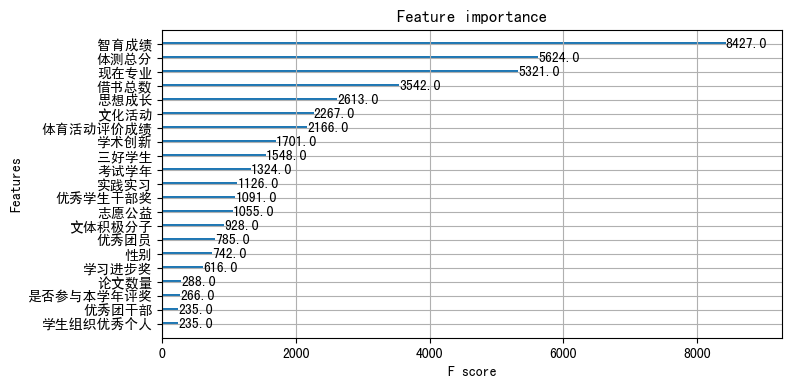

Bad pipe message: %s [b'\x8b\x16\x03\xf29\xf8Hm5\xf0K\\:\x94e\xdb\\8 m\x19\x03%\x98V\xd0\x17)\xfd\xa3\xc76\xbcz\rF\xdcg\x98\xf4\xa7\xd1|\xe50\xcc\\\xd7:\x0c\xd0\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04']
Bad pipe message: %s [b'\x03\x06', b'\x07\x08']
Bad pipe message: %s [b'\xc8\x88\xbb']
Bad pipe message: %s [b"\xe3\xaf\xf0J\x8aj\xcc\x8e\x1f\x9a>z\xeb<A\x11\x80\x01\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0"]
Bad pipe message: %s [b"3c\x9eTR\xe7\n\xaa\xaaG\x0c\x98\xdd:\xdb\xd1\xfc\xad\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xc

In [56]:
import matplotlib.pyplot as plt
# 中文乱码解决方法
plt.rcParams["font.sans-serif"] = ["SimHei"]
xgb.plot_importance(bst)
plt.rcParams['figure.figsize'] = [8, 4]
plt.show()